> 위스콘신 유방암 데이터셋과 타이타닉 탑승자 데이터 셋을 KNN 알고리즘으로 분류분석하고 로지스틱과 비교, 어떤 알고리즘이 더 좋은 성능 내는지 결론내기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
import re

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/breast-cancer-wisconsin.xlsx", index_col="id", categories=["diagnosis"])

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se 

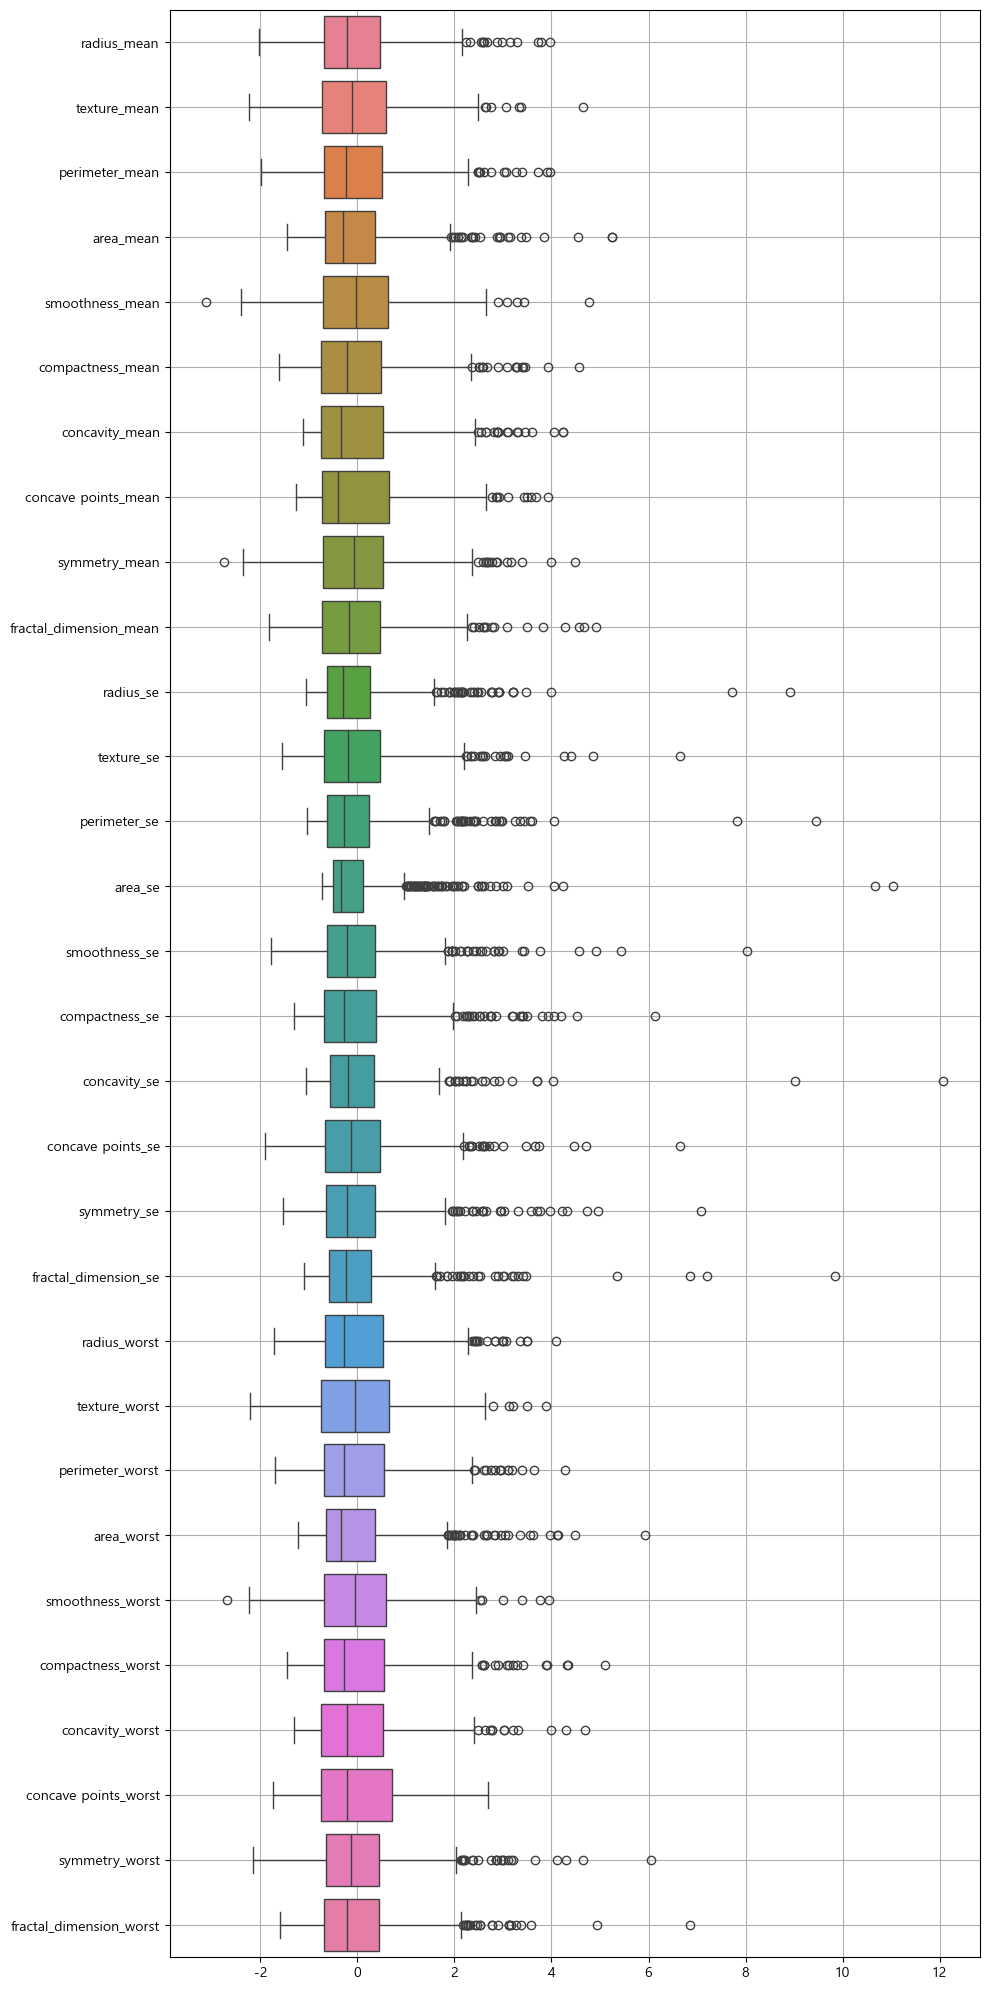

In [3]:
# 데이터 전처리
df = my_standard_scaler(origin, 'diagnosis')
my_boxplot(df, orient = 'h', figsize=(10, 20))

In [4]:
# 종속변수 라벨링
df2 = my_labelling(df, 'diagnosis')
my_pretty_table(df2.head())

+----------+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+-------------+--------------+----------------+-----------+-----------------+------------------+----------------+---------------------+---------------+------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-------------+
|       id |   radius_mean |   texture_mean |   perimeter_mean |   area_mean |   smoothness_mean |   compactness_mean |   concavity_mean |   concave points_mean |   symmetry_mean |   fractal_dimension_mean |   radius_se |   texture_se |   perimeter_se |   area_se |   smoothness_se |   compactness_se |   concavity_se |   concave points_se |   symmetry_se |   fractal_dimension_se |   radius_worst 

In [5]:
# 데이터 분할
x_train, x_test, y_train, y_test = my_train_test_split(df2,yname='diagnosis',test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
|  6 | manhattan |             3 | uniform   |           0.96044 |
|  7 | manhattan |             3 | distance  |           0.96044 |
|  4 | euclidean |             7 | uniform   |          0.958242 |
|  0 | euclidean |             3 | uniform   |          0.956044 |
|  1 | euclidean |             3 | distance  |          0.956044 |
|  5 | euclidean |             7 | distance  |          0.956044 |
|  2 | euclidean |             5 | uniform   |          0.953846 |
|  3 | euclidean |             5 | distance  |          0.953846 |
| 10 | manhattan |             7 | uniform   |          0.953846 |
| 11 | manhattan |             7 | distance  |          0.953846 |
|  8 | manhattan |             5 | uniform   |          0.951648 |
|  9 | manhattan |             5 | distance  |         

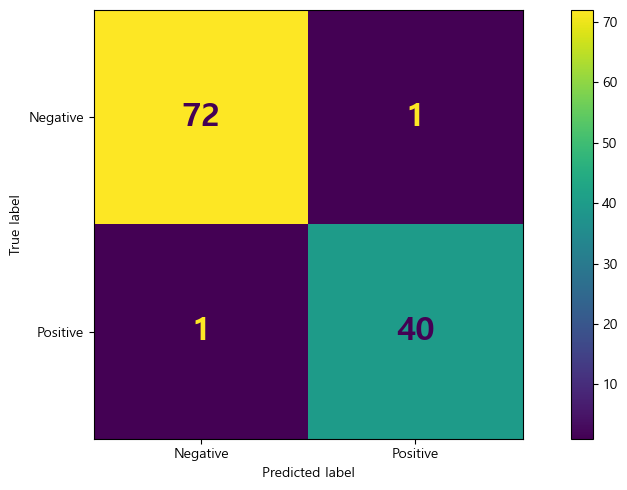

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


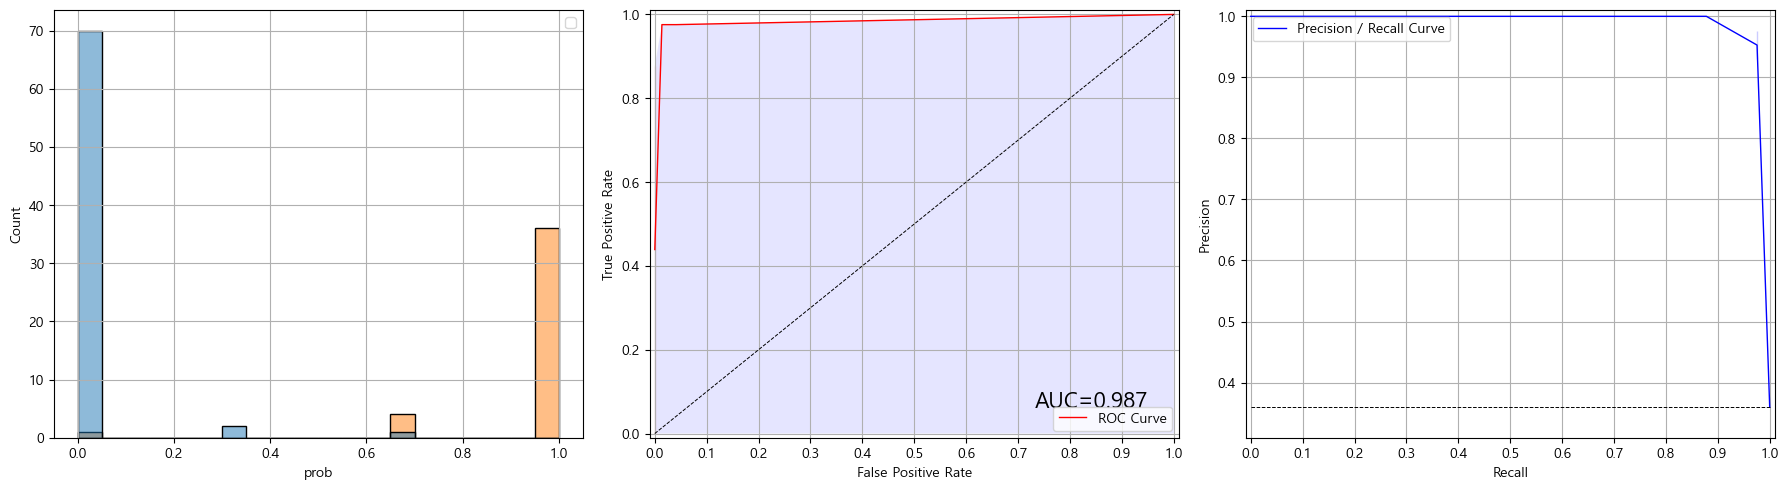


[학습곡선]


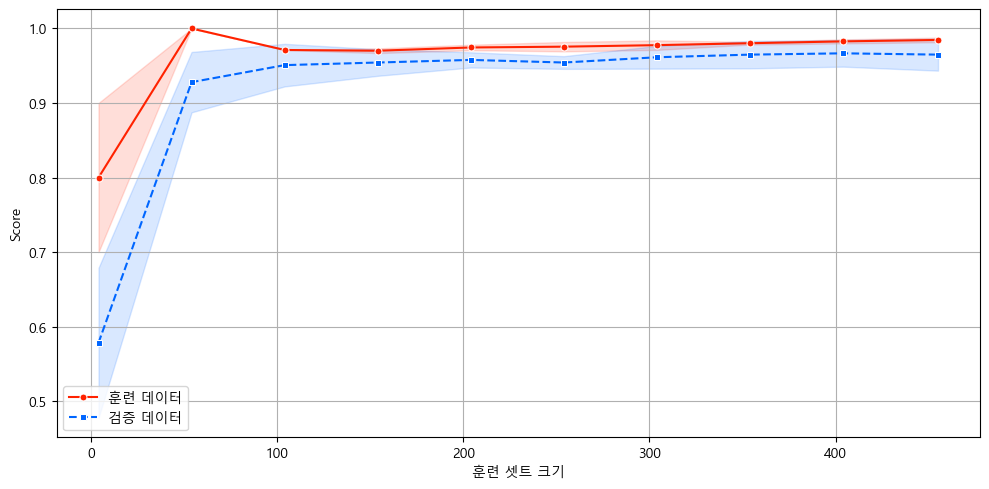

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)

In [6]:
# 분류 알고리즘 적용
my_knn_classification(x_train, y_train, x_test, y_test)

> 로지스틱 분석과 KNN분석 모두 정확도는 0.982456 으로 같으나 실제 양성인데 양성으로 예측한 비율인 재현율이 로지스틱은 0.95122, KNN은 0.97561로 조금 높았다. 
재현율이 중요한 의학데이터이므로 KNN분석이 조금 더 적합한 모델로 판단된다. 

타이타닉 2차전

In [7]:
origin = my_read_excel("https://data.hossam.kr/edadata/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'], info=False)

In [8]:
df = origin.copy()

In [9]:
df.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [10]:
# 나이에 대한 결측치를 평균 나이로 대체
mean_age_df = df[['Survived', 'Age']].groupby('Survived').mean()
mean_age_df

,Age
Survived,
0,30.510986
1,28.931079


In [11]:
for i in mean_age_df.index:
    mean_age = round(mean_age_df.loc[i]['Age'],0)
    #print(mean_age)
    
    expr = (df['Survived'] == i) & (df['Age'].isna())
    df.loc[expr, 'Age'] = df.loc[expr, 'Age'].fillna(mean_age)
    
df['Age'].isna().sum()
                                    

0

In [12]:
# 나이 구간별 라벨링
df2 = df.copy()
df2.loc[df2['Age'] <= 16, "Age"] = 0
df2.loc[(df2['Age'] > 16) & (df2['Age'] <= 32), "Age"] = 1
df2.loc[(df2['Age'] > 32) & (df2['Age'] <= 48), "Age"] = 2
df2.loc[(df2['Age'] > 48) & (df2['Age'] <= 64), "Age"] = 3
df2.loc[df2['Age'] > 64, "Age"] = 4


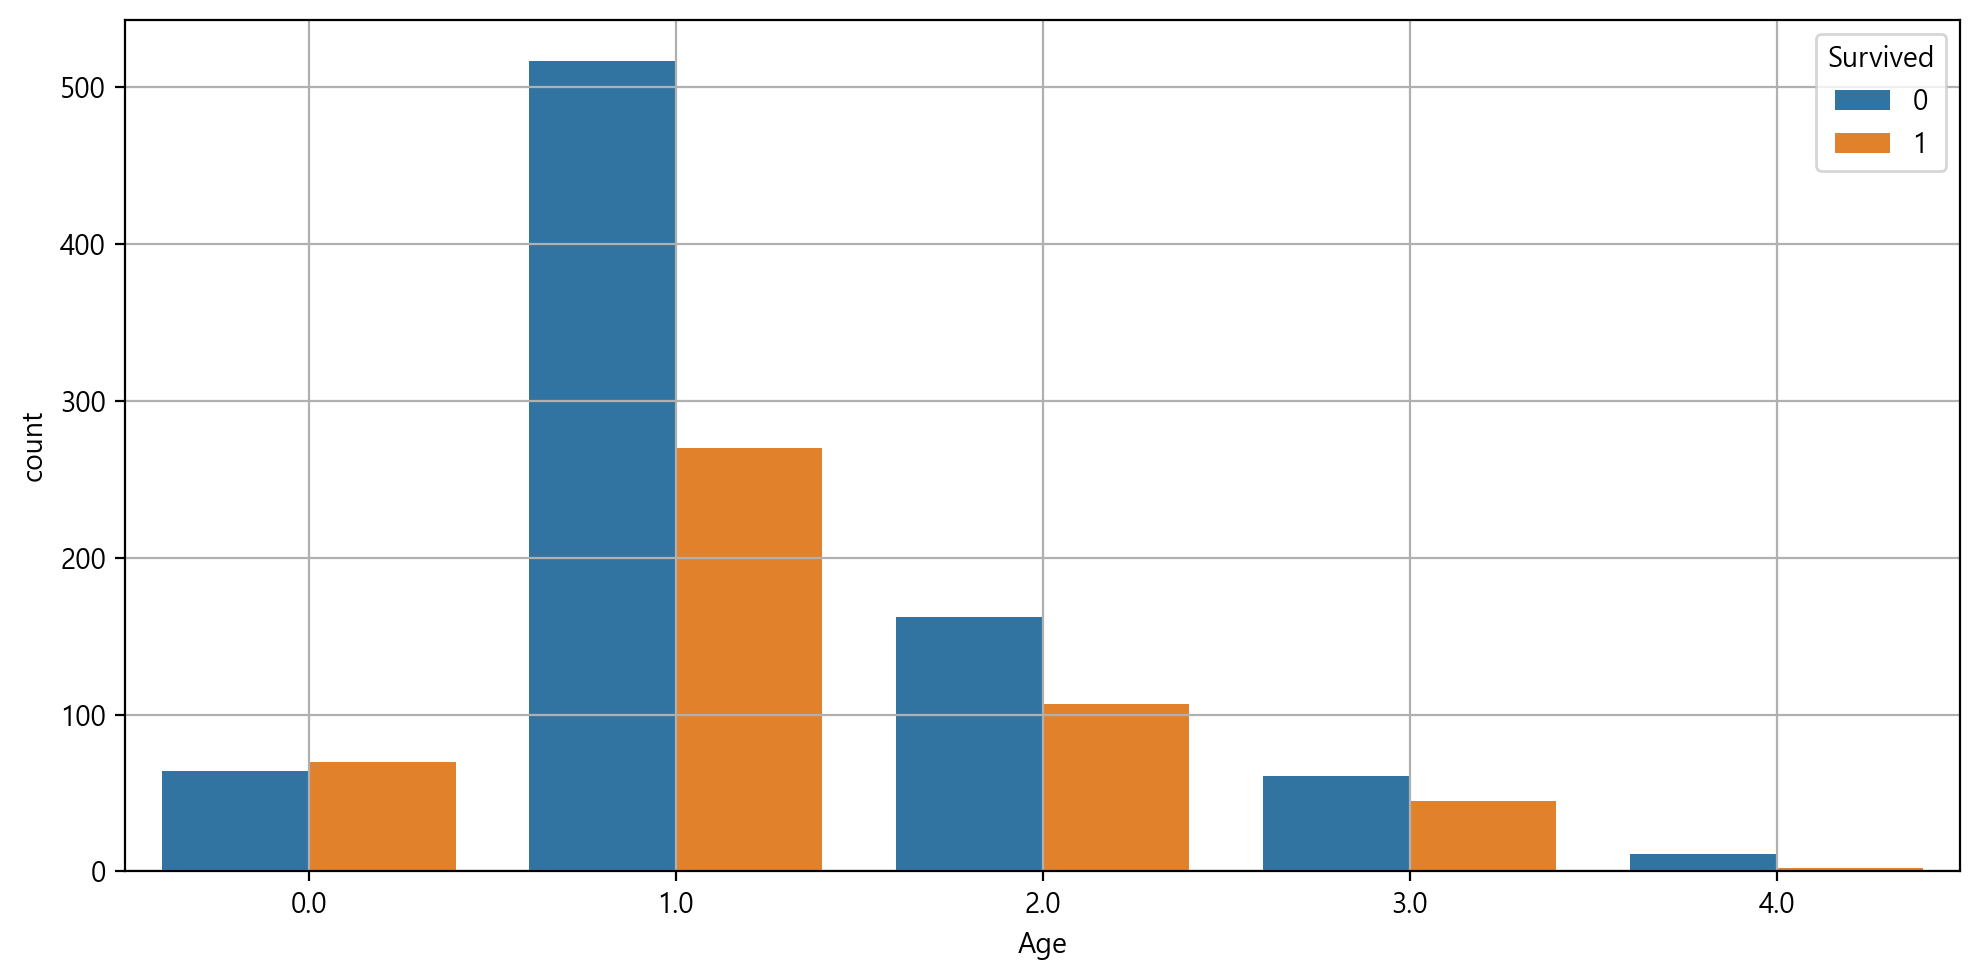

In [13]:
my_countplot(df2, xname='Age', hue='Survived', dpi = 200)

In [14]:
# 객실의 유무에 따른 파생변수 생성
df2['Has_Cabin'] = df2['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
df2['Has_Cabin'].value_counts()

Has_Cabin
0    1014
1     295
Name: count, dtype: int64

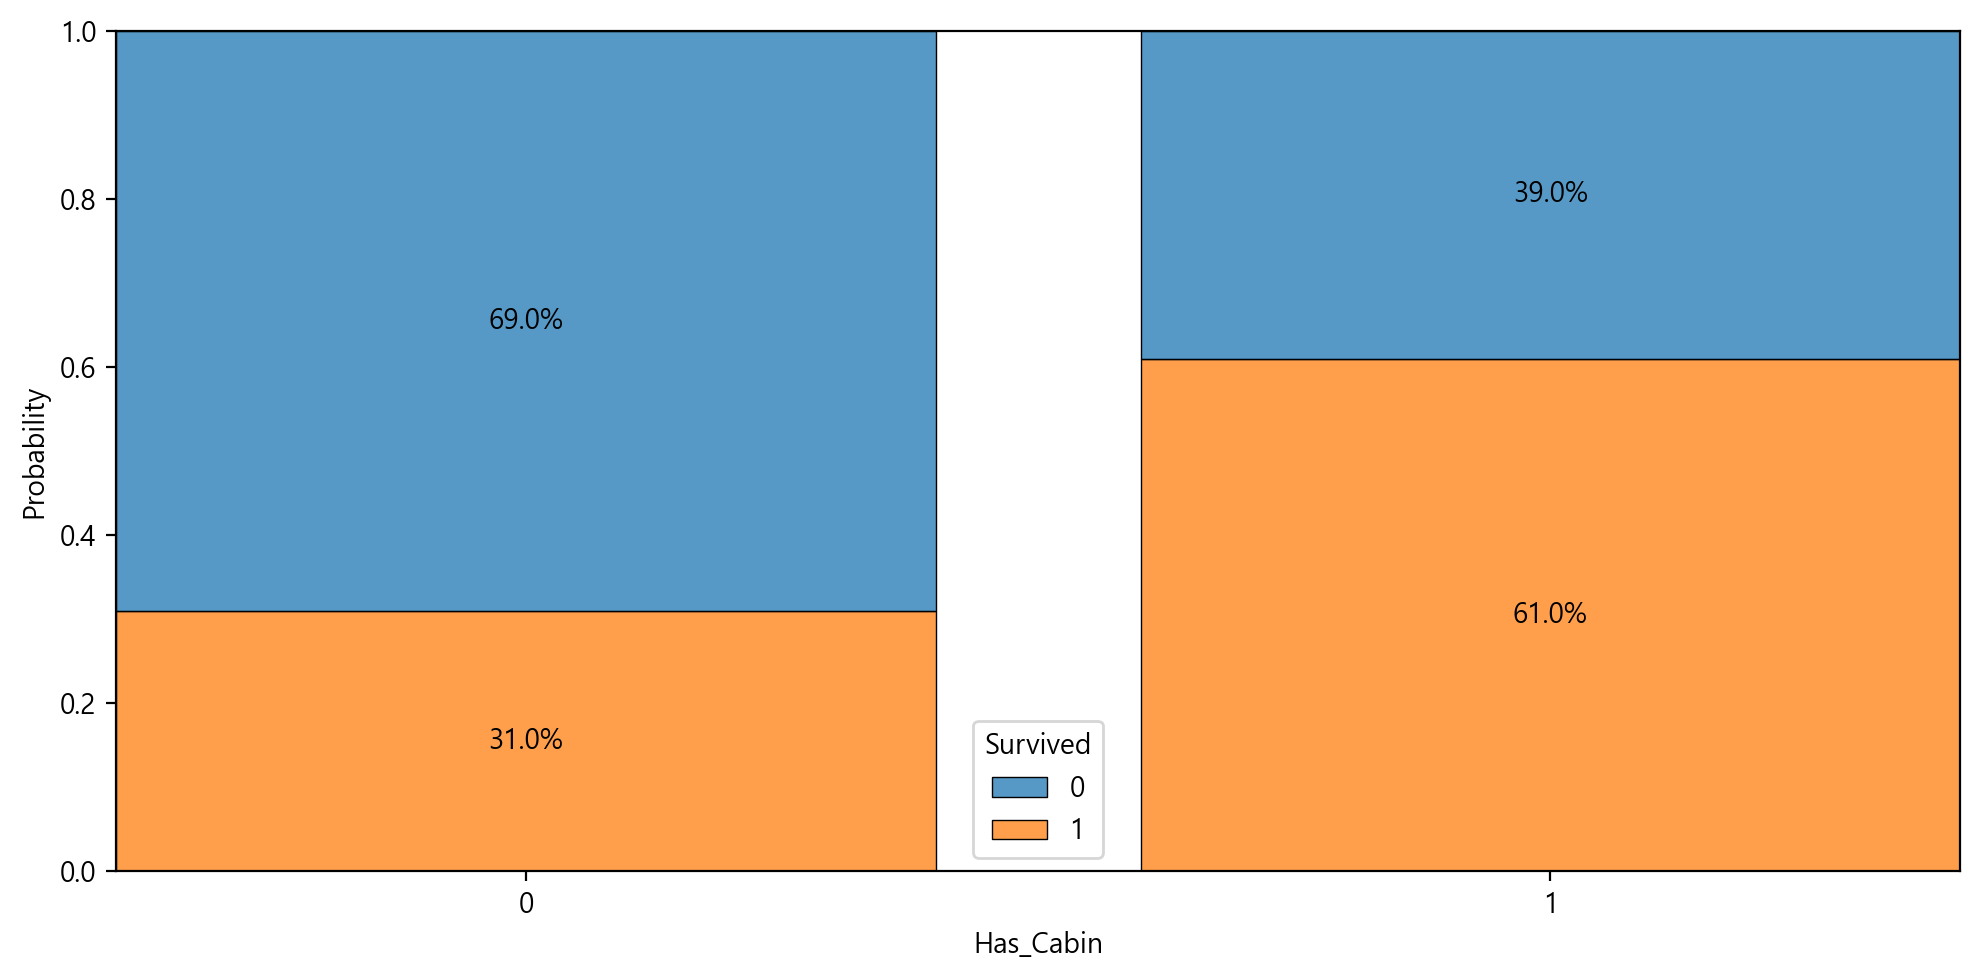

In [15]:
my_stackplot(df2, xname='Has_Cabin', hue='Survived', dpi=200)

In [16]:
# 가족 구성원 수
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

In [17]:
df2['IsAlone'] = 0
df2.loc[df2['FamilySize'] == 1, 'IsAlone'] = 1

In [18]:
most_embarked_df = df2[['Survived','Embarked']].groupby('Survived').agg(Series.mode)
most_embarked_df

,Embarked
Survived,
0,S
1,S


In [19]:
for i in most_embarked_df.index:
    most = most_embarked_df.loc[i]['Embarked']
    #print(most)

    expr = (df2['Survived'] == i) & (df2['Embarked'].isna())
    #print(expr)

    df2.loc[expr, 'Embarked'] = df2.loc[expr, 'Embarked'].fillna(most)

df2['Embarked'].isna().sum()

0

In [20]:
df2['Fare'].isna().sum()

1

In [21]:
mean_fare_df = df2[['Survived','Fare']].groupby('Survived').mean()
mean_fare_df

,Fare
Survived,
0,23.879124
1,48.811497


In [22]:
for i in mean_fare_df.index:
    mean_fare = mean_fare_df.loc[i]['Fare']
    #print(mean_fare)

    expr = (df2['Survived'] == i) & (df2['Fare'].isna())
    #print(expr)

    df2.loc[expr, 'Fare'] = df2.loc[expr, 'Fare'].fillna(mean_fare)

df2['Fare'].isna().sum()

0

In [23]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    
    return ""

In [24]:
df2['Title'] = df2['Name'].apply(get_title)
df2['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [25]:
df2['Title'] = df2['Title'].replace(['Rev', 'Dr', 
                'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 
                'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer', 'Dona'], "Rare")

df2['Title'].value_counts()

Title
Mr        757
Miss      260
Mrs       197
Master     61
Rare       34
Name: count, dtype: int64

In [26]:
df3 = my_labelling(df2, 'Title', 'Embarked', 'Sex')
my_pretty_table(df3.head())

+---------------+------------+----------+-----------------------------------------------------+-------+-------+---------+---------+------------------+---------+---------+------------+-------------+--------------+-----------+---------+
|   PassengerId |   Survived |   Pclass | Name                                                |   Sex |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   |   Embarked |   Has_Cabin |   FamilySize |   IsAlone |   Title |
|---------------+------------+----------+-----------------------------------------------------+-------+-------+---------+---------+------------------+---------+---------+------------+-------------+--------------+-----------+---------|
|             1 |          0 |        3 | Braund, Mr. Owen Harris                             |     1 |     1 |       1 |       0 | A/5 21171        |    7.25 | nan     |          2 |           0 |            2 |         0 |       2 |
|             2 |          1 |        1 | Cumings, Mrs. John

In [27]:
my_outlier_table(df3, 'Fare')

,Q1,Q2,Q3,IQR,UP,DOWN
FIELD,,,,,,
Fare,7.8958,14.4542,31.275,23.3792,66.3438,-27.173


In [28]:
df3.loc[ df3['Fare'] <= 7.9, "Fare"] = 0
df3.loc[ (df2['Fare'] > 7.9) & (df3['Fare'] <= 14.5), "Fare"] = 1
df3.loc[ (df3['Fare'] > 14.5) & (df3['Fare'] <= 31.3), "Fare"] = 2
df3.loc[ df3['Fare'] > 31.3, "Fare"] = 3

In [29]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df4 = df3.drop(drop_elements, axis = 1)

my_pretty_table(df4.head())

+---------------+------------+----------+-------+-------+--------+------------+-------------+--------------+-----------+---------+
|   PassengerId |   Survived |   Pclass |   Sex |   Age |   Fare |   Embarked |   Has_Cabin |   FamilySize |   IsAlone |   Title |
|---------------+------------+----------+-------+-------+--------+------------+-------------+--------------+-----------+---------|
|             1 |          0 |        3 |     1 |     1 |      0 |          2 |           0 |            2 |         0 |       2 |
|             2 |          1 |        1 |     0 |     2 |      3 |          0 |           1 |            2 |         0 |       3 |
|             3 |          1 |        3 |     0 |     1 |      1 |          2 |           0 |            1 |         1 |       1 |
|             4 |          1 |        1 |     0 |     2 |      3 |          2 |           1 |            2 |         0 |       3 |
|             5 |          0 |        3 |     1 |     2 |      1 |          2 |    

In [30]:
df4['Survived'] = df4['Survived'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df2, yname = 'Survived', test_size=0.2, scalling=False)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1047, 14), (262, 14), (1047,), (262,))

In [31]:
my_knn_classification(x_train,y_train, x_test, y_test)

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py", line 238, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py", line 476, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 1049, in check_array
    _assert_all_finite(
  File "c:\Users\Jihwan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 111, in _assert_all_finite
    raise ValueError("Input contains NaN")
ValueError: Input contains NaN
